In [ ]:
# Social_Network_Ads.csv

# **Step 1 | Data Pre-Processing**

**Importing the Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the dataset**

In [2]:
df = pd.read_csv("/content/Social_Network_Ads.csv")

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


*Data are in right formats.*

In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

*There is no missing values*

In [6]:
df.duplicated().value_counts()

False    400
dtype: int64

*There are no duplicates.*

In [7]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


*Data is already cleaned.*

# **Step 2 | EDA**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


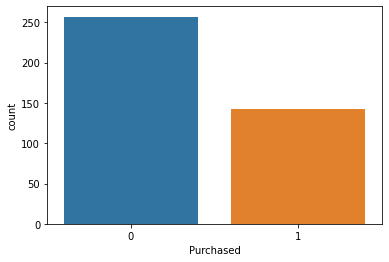

In [25]:
sns.countplot(df['Purchased'])

*Counts pf people purchased car is lesser than people not purchased.*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


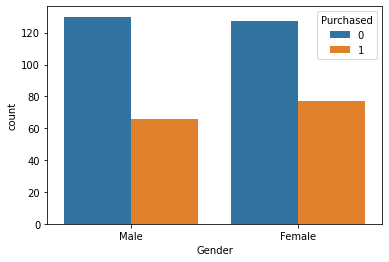

In [26]:
sns.countplot(df['Gender'], hue = df['Purchased'])

*Counts of SUV purchased and not purchased by both male annd female are similar.* 

*So we can say, gender doesn't play a role.*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


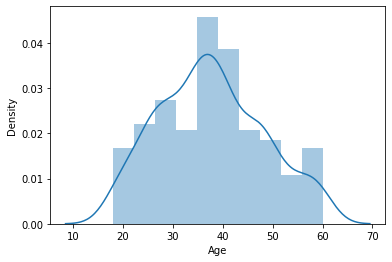

In [31]:
sns.distplot(df['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


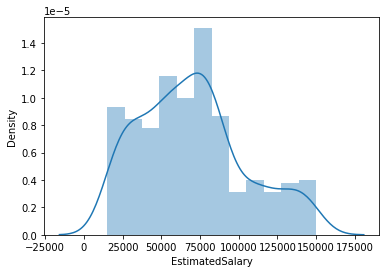

In [32]:
sns.distplot(df['EstimatedSalary'])

*Age looks normallyy distributed.*

*Estimated Salary is positively skewed.*

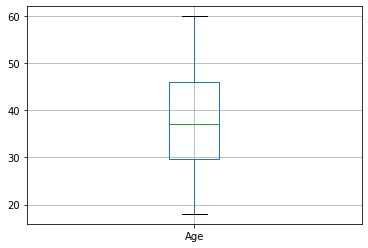

In [27]:
df.boxplot('Age')

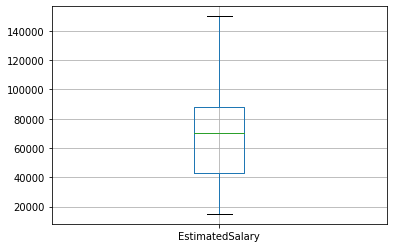

In [28]:
df.boxplot('EstimatedSalary')

*There are no outliers in the data.*

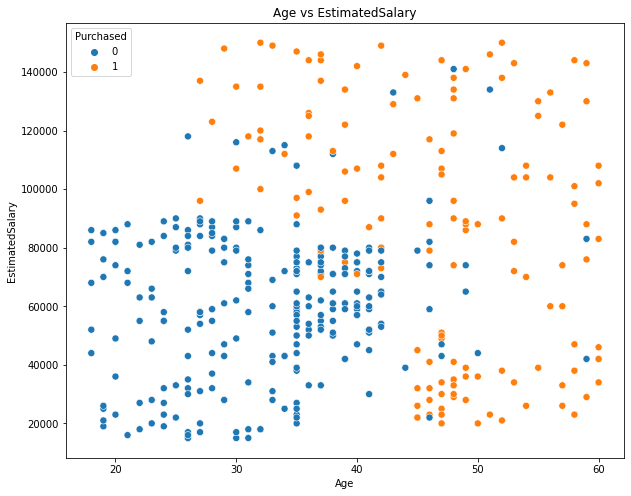

In [8]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = "Age", y = "EstimatedSalary",hue = 'Purchased',data = df, s = 50)
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.title('Age vs EstimatedSalary')
plt.show()

*We can see from the graph, that there is linear decision boundary between the two features.*

**Splitting the dataset into the Training set and Test set**

In [9]:
x = df[['Age','EstimatedSalary']].values
y = df['Purchased']

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=101)

In [13]:
x_train.shape, x_test.shape

((320, 2), (80, 2))

**Feature Scaling**

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# **Step 3 | Logistic Regression Model**

The library for this job which is going to be the linear model library and it is called linear because the logistic regression is a linear classifier which means that here since we're in two dimensions, our two categories of users are going to be separated by a straight line. Then import the logistic regression class. Next we will create a new object from this class which is going to be our classifier that we are going to fit on our training set.

**Fitting Logistic Regression to the Training set**

In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

# **Step 4 | Predection**

In [16]:
y_pred = model.predict(x_test)

In [17]:
pd.DataFrame({"Actual":y_test,'Predicted':y_pred})

,Actual,Predicted
38,0,0
387,0,0
270,0,1
181,0,0
195,0,0
...,...,...
130,0,0
13,0,0
141,0,0
304,0,0


# **Step 5 | Evaluating The Predection**

We predicted the test results and now we will evaluate if our logistic regression model learned and understood correctly. So this confusion matrix is going to contain the correct predictions that our model made on the set as well as the incorrect predictions.

In [18]:
model.score(x_test,y_test)

0.85

In [19]:
from sklearn.metrics import f1_score

f1_score(y_test,y_pred)

0.76

**Making the Confusion Matrix**

In [20]:
from sklearn.metrics import confusion_matrix,plot_roc_curve,plot_confusion_matrix

cf = confusion_matrix(y_test,y_pred)
cf

array([[49,  5],
       [ 7, 19]])

**Visualization**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


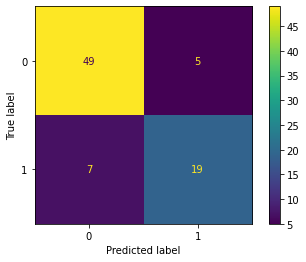

In [21]:
plot_confusion_matrix(model, x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


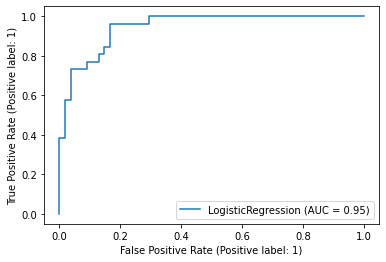

In [22]:
plot_roc_curve(model, x_test, y_test)

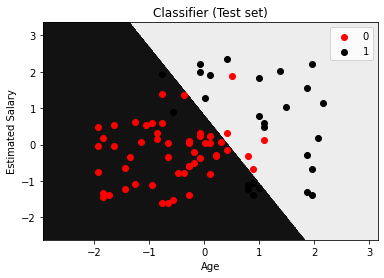

In [23]:
x1, x2 = np.meshgrid(np.arange(start = x_test[:, 0].min() - 1,
                               stop = x_test[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_test[:, 1].min() - 1,
                               stop = x_test[:, 1].max() + 1, step = 0.01))

z = model.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape)

plt.contourf(x1, x2, z, cmap = 'gray')

for i, j in enumerate(np.unique(y_test)):
    plt.scatter(x_test[y_test == j, 0], x_test[y_test == j, 1], label = j,color = ('red','black')[i])

plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()